In [1]:
## note these to add w/Poetry to the Dockerfile
%pip install pandas
%pip install networkx
%pip install scipy

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.spatial.distance import pdist
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras import Model
from tensorflow.keras.constraints import NonNeg 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [3]:
url = 'http://cs.bc.edu/~prudhome/AAPLD/animal-similarity.csv'

raw_dataset = pd.read_csv(url, index_col=0)
list_of_animal_pairs = raw_dataset.index.str.split('~')

In [4]:
animal_pair_data = pd.DataFrame.from_records(list_of_animal_pairs, columns=['first_animal', 'second_animal'], index= raw_dataset.index)

In [5]:
animal_pair_data.sort_values(by = ['first_animal', 'second_animal'], inplace=True)

In [6]:
unique_animals = set(animal_pair_data.first_animal).union(animal_pair_data.second_animal)

In [7]:
animal_pairs = nx.Graph()
animal_pairs.add_nodes_from(unique_animals)
animal_pairs.add_edges_from(list_of_animal_pairs)

In [8]:
low_degree=[k for k,v in animal_pairs.degree._nodes.items() if len(v) < 32]

In [9]:
animal_pairs.remove_nodes_from(low_degree)

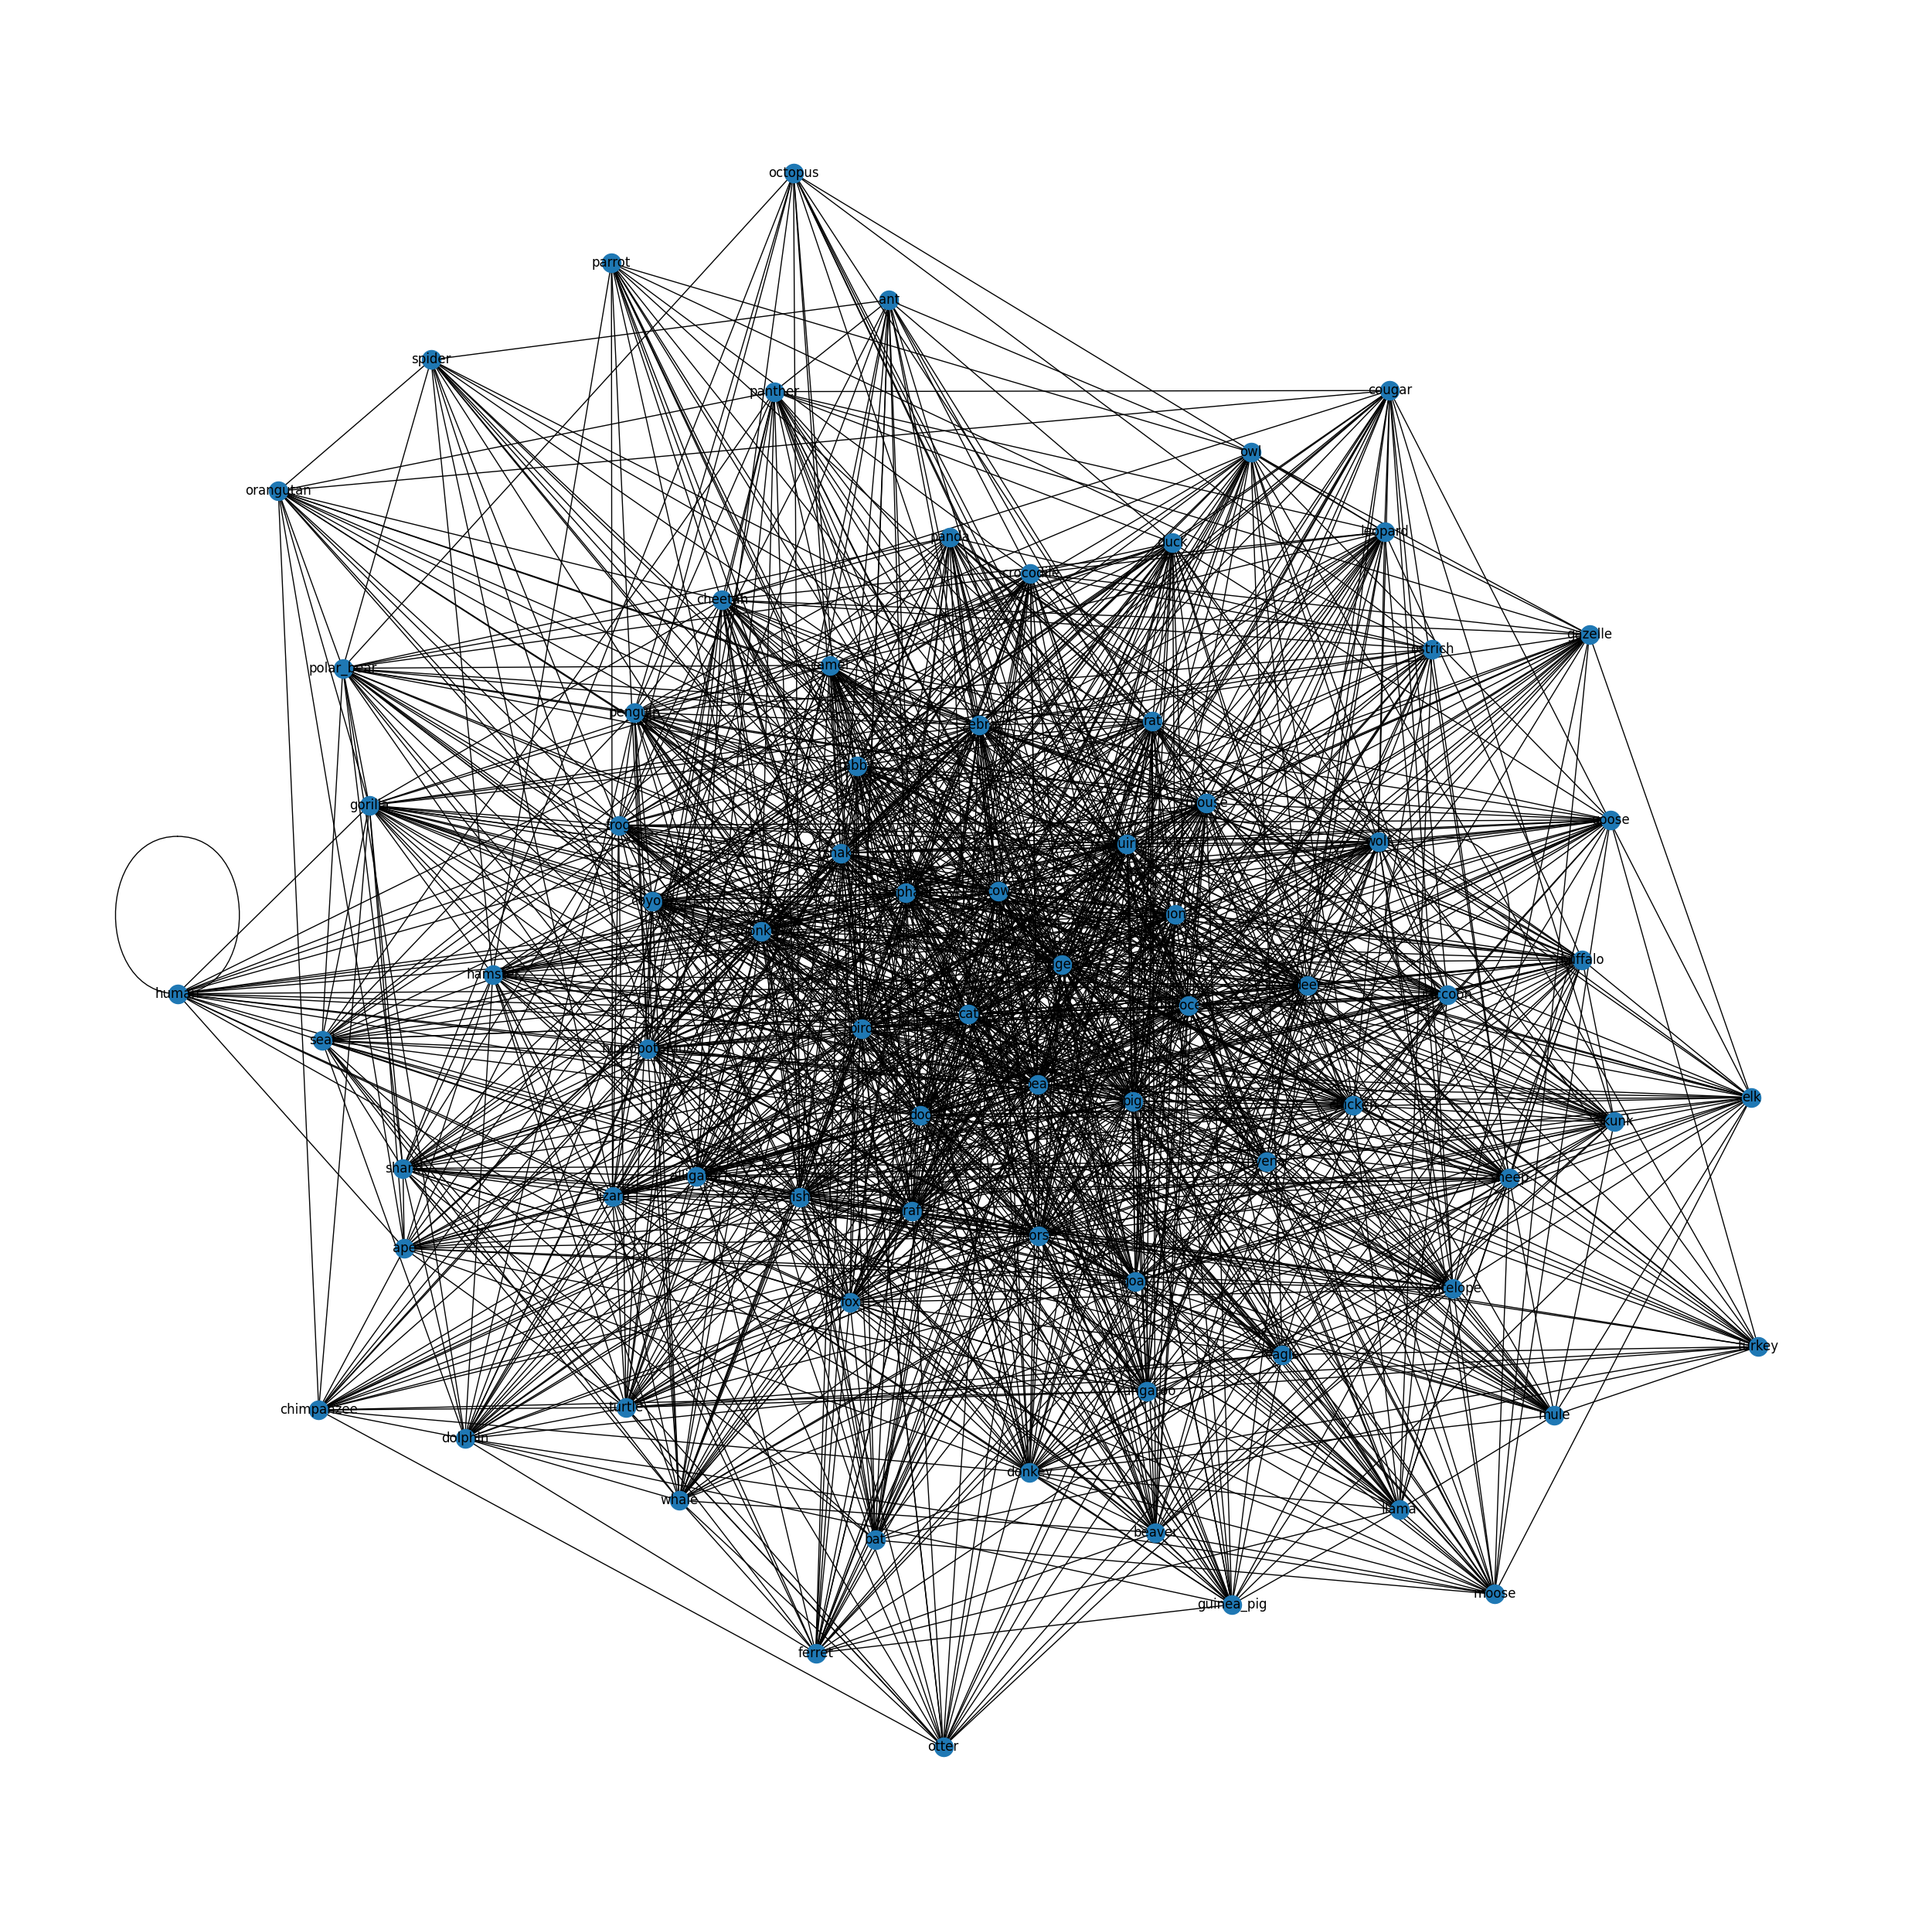

In [10]:
fig, ax = plt.subplots(figsize=(32,32))
nx.draw(animal_pairs, with_labels=True, ax=ax)

plt.show()

In [11]:
connected_list = [x for x in animal_pairs.nodes]

In [12]:
# try the small list, or, failing that, just the apes

In [13]:
smaller_animal_pair_data=animal_pair_data.loc[animal_pair_data['first_animal' ].isin( connected_list) & animal_pair_data['second_animal' ].isin( connected_list) ] 

In [14]:
joined_data=smaller_animal_pair_data.join(raw_dataset).drop(columns='[All_Ratings]')

In [15]:
big_matrix = pd.DataFrame(index=connected_list, columns = connected_list)

In [16]:
joined_data

first_animal second_animal  Average_Rating
Pair                                                         
alligator~antelope    alligator      antelope           1.940
alligator~bird        alligator          bird           2.080
alligator~buffalo     alligator       buffalo           1.080
alligator~elephant    alligator      elephant           1.140
alligator~fish        alligator          fish           1.000
...                         ...           ...             ...
zebra~seal                zebra          seal           1.040
zebra~shark               zebra         shark           1.067
zebra~snake               zebra         snake           1.880
zebra~tiger               zebra         tiger           2.720
zebra~turtle              zebra        turtle           1.120

[1601 rows x 3 columns]

In [17]:
#TODO wrap below section into functions

In [18]:
for row in joined_data.iterrows():
    big_matrix.loc[row[1].first_animal][row[1].second_animal] = row[1].Average_Rating
    big_matrix.loc[row[1].second_animal][row[1].first_animal] = row[1].Average_Rating

In [19]:
big_matrix = big_matrix.astype(float)

In [20]:
# big_matrix = big_matrix[big_matrix.isna().mean(1) < 0.5]
# big_matrix = big_matrix[big_matrix.index.to_list()]

In [21]:
big_matrix = big_matrix[big_matrix.isna().mean(1) < 0.33]

In [22]:
big_matrix = big_matrix[big_matrix.index.to_list()]

In [23]:
plt.matshow(big_matrix)

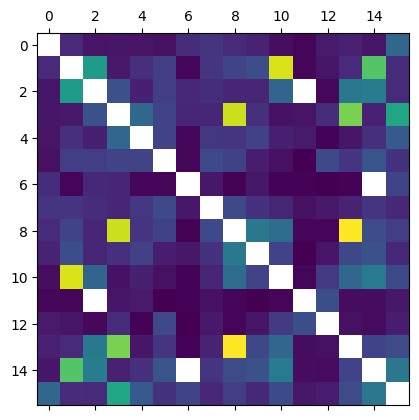

In [24]:
plt.show()

In [25]:
big_matrix.isna().mean(1)

monkey      0.0625
horse       0.0625
cow         0.1250
cat         0.0625
pig         0.0625
bear        0.0625
bird        0.1250
elephant    0.0625
lion        0.0625
giraffe     0.0625
zebra       0.0625
fish        0.1250
snake       0.0625
tiger       0.0625
deer        0.1250
dog         0.0625
dtype: float64

In [26]:
big_matrix.shape

(16, 16)

In [27]:
big_matrix

monkey  horse    cow    cat    pig   bear  bird  elephant   lion  \
monkey       NaN  1.640  1.290  1.320  1.280  1.240  1.68     1.810  1.640   
horse       1.64    NaN  3.860  1.360  1.720  1.960  1.08     1.800  2.040   
cow         1.29  3.860    NaN  2.300  1.460  1.960  1.58     1.683  1.560   
cat         1.32  1.360  2.300    NaN  2.717  2.080  1.56     1.560  5.820   
pig         1.28  1.720  1.460  2.717    NaN  2.080  1.10     1.840  1.780   
bear        1.24  1.960  1.960  2.080  2.080    NaN  1.10     2.160  2.020   
bird        1.68  1.080  1.580  1.560  1.100  1.100   NaN     1.340  1.040   
elephant    1.81  1.800  1.683  1.560  1.840  2.160  1.34       NaN  2.160   
lion        1.64  2.040  1.560  5.820  1.780  2.020  1.04     2.160    NaN   
giraffe     1.50  2.250  1.540  1.700  2.020  1.425  1.34     1.740  3.100   
zebra       1.20  5.917  2.700  1.260  1.460  1.240  1.06     1.550  2.840   
fish        1.10  1.100    NaN  1.300  1.370  1.000  1.06     1.240  1.067   
snake       1.38  1.300  1.110  1.660  1.060  2.160  1.00     1.360  1.100   
tiger       1.48  1.620  3.117  5.160  1.320  1.780  1.06     1.500  6.220   
deer        1.32  4.820  3.220  1.480  1.700  2.360   NaN     1.800  2.200   
dog         2.72  1.660  1.620  4.080  2.480  1.760  2.05     1.600  1.940   

          giraffe  zebra   fish  snake  tiger  deer    dog  
monkey      1.500  1.200  1.100   1.38  1.480  1.32  2.720  
horse       2.250  5.917  1.100   1.30  1.620  4.82  1.660  
cow         1.540  2.700    NaN   1.11  3.117  3.22  1.620  
cat         1.700  1.260  1.300   1.66  5.160  1.48  4.080  
pig         2.020  1.460  1.370   1.06  1.320  1.70  2.480  
bear        1.425  1.240  1.000   2.16  1.780  2.36  1.760  
bird        1.340  1.060  1.060   1.00  1.060   NaN  2.050  
elephant    1.740  1.550  1.240   1.36  1.500  1.80  1.600  
lion        3.100  2.840  1.067   1.10  6.220  2.20  1.940  
giraffe       NaN  2.040  1.020   1.30  2.125  2.30  1.600  
zebra       2.040    NaN  1.080   1.88  2.720  3.18  2.175  
fish        1.020  1.080    NaN   2.26  1.180  1.18  1.340  
snake       1.300  1.880  2.260    NaN  1.240  1.16  1.420  
tiger       2.125  2.720  1.180   1.24    NaN  2.04  2.200  
deer        2.300  3.180  1.180   1.16  2.040   NaN  3.060  
dog         1.600  2.175  1.340   1.42  2.200  3.06    NaN

In [28]:
# todo make into function
similarities = big_matrix.to_numpy()
similarity_vec = np.tril(similarities, -1)
similarity_vec = similarity_vec[np.nonzero(similarity_vec)]

In [29]:
# FIll in NA's 

In [30]:
similarity_vec = np.nan_to_num(similarity_vec, nan=min(similarity_vec))

In [31]:
dissimilarity_vec = np.exp(-1*similarity_vec)

In [32]:
len(dissimilarity_vec) 
# :=Y  = n(n-1)/2
# 2Y = n^2 - n
# 0 = n^2 - n - 2Y

# 0 = (n - 1/2) ^2 - 1/4 - 2Y 
# 2Y + 1/4 = (n - 1/2)^2
# N = 1/2 + sqrt(2Y + 1/4)


120

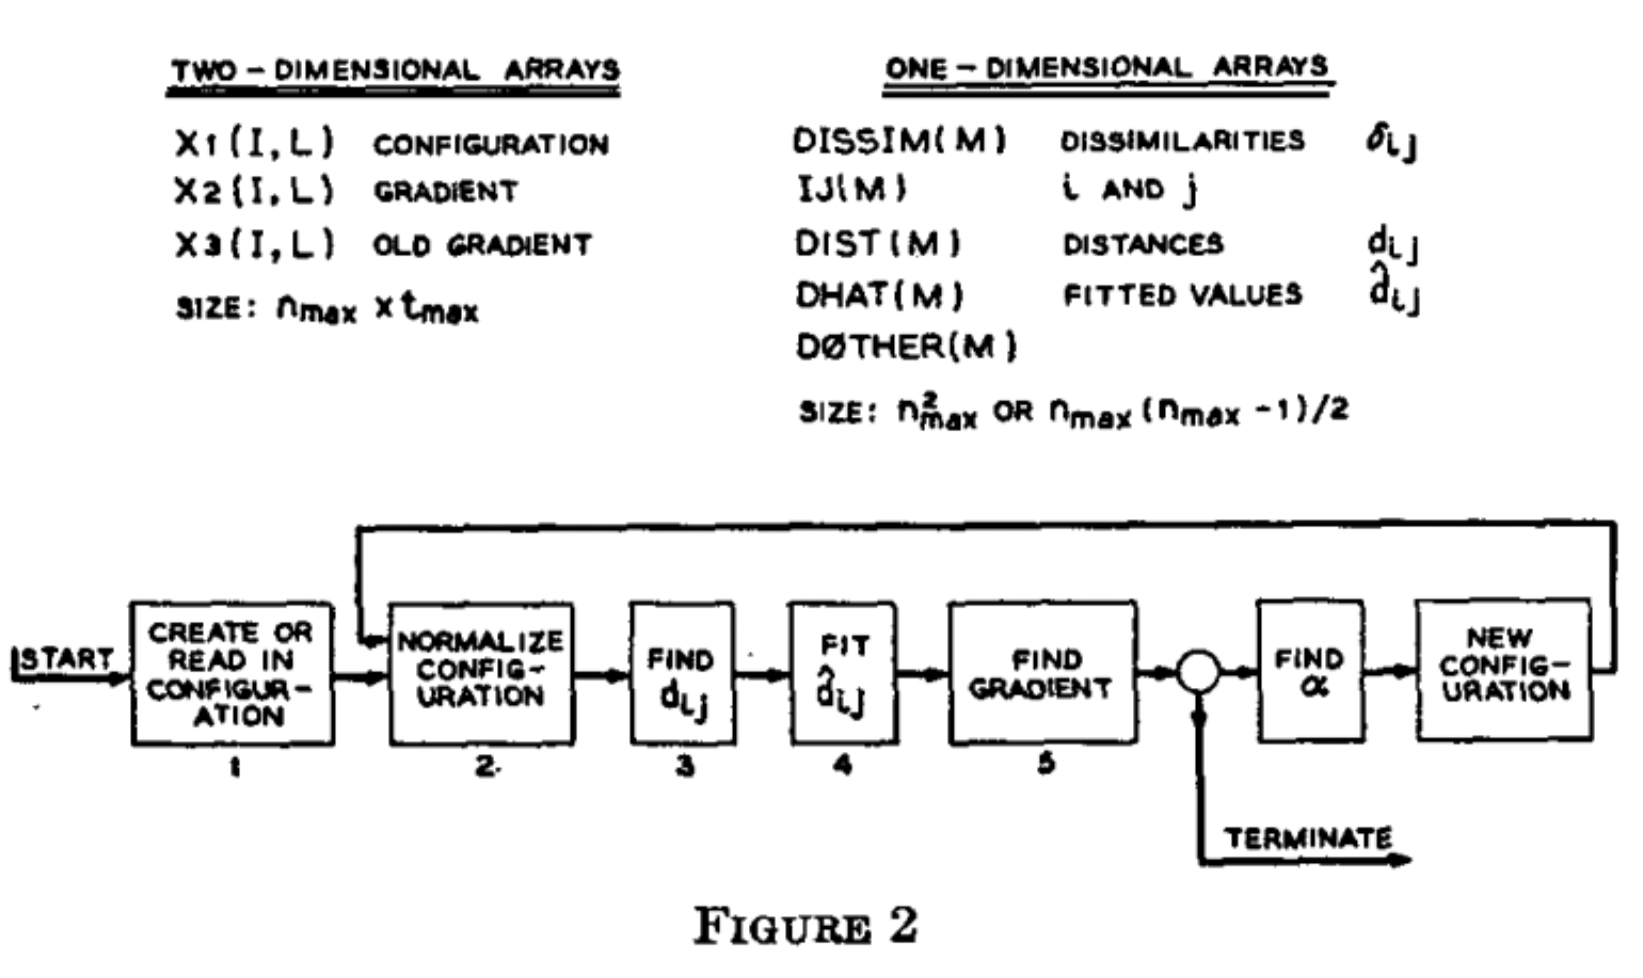
From Kruskal, 1964

Idea is to follow these steps, 

In [33]:
def generate_starting_configuration(dis_vec, n_points, dim=2):
    ## Generate kruskal_style t-dimensional starting configuration
    #  N = 1/2 + sqrt(2Y + 1/4)

    assert n_points == int(1/2 + np.sqrt(2*len(dis_vec) +1/4))
    
    max_multiplier = n_points//dim + 2
    #say 503 points in2 dim, then we need 252 diags, drop the last row of the last one , s0 have to go from 
    # 1 to n_points/dim +2
    starting_config = np.vstack([np.diag(j*np.ones(dim)) for j in range(1,max_multiplier)])
    return starting_config[:n_points,:]


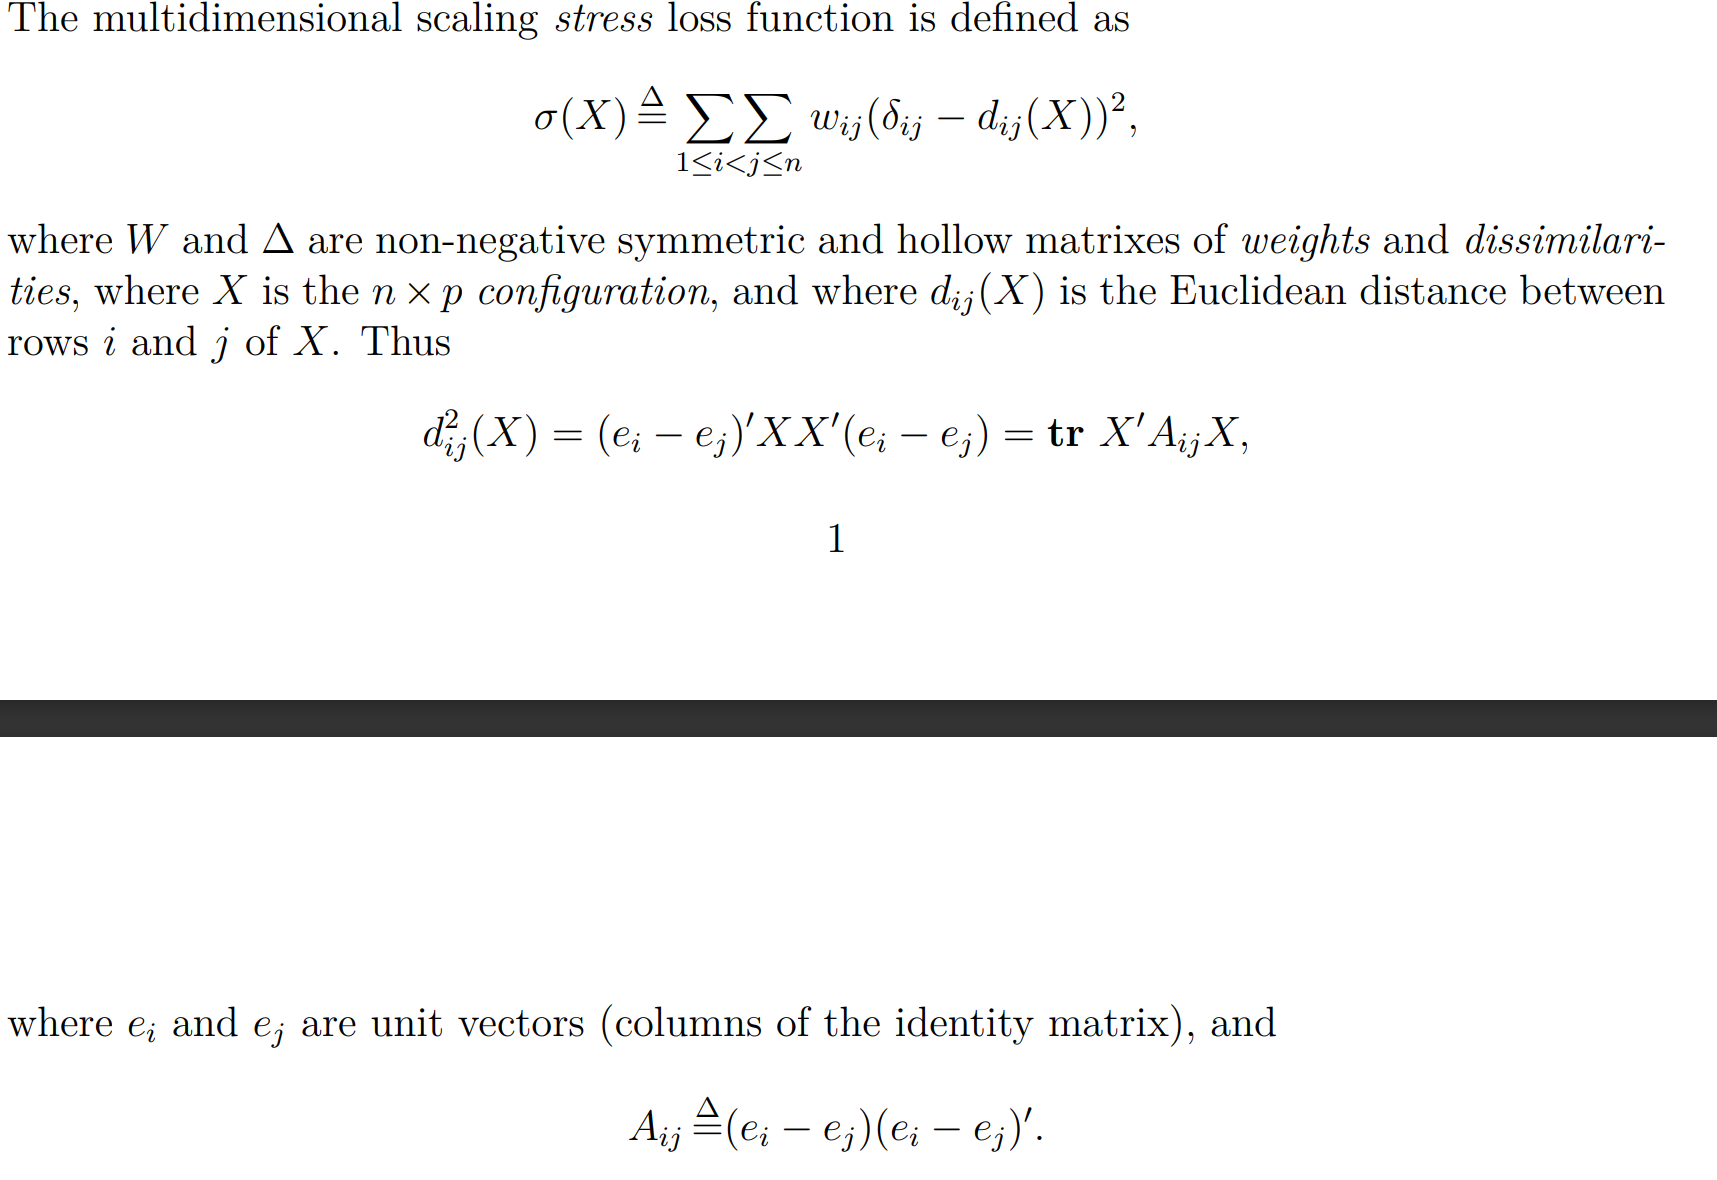
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/
NB: $\delta_{ij}$ here is the true dissimilarity between $i$ and $j$ 

In [34]:
## TODO move to matrix_utils.py 
## MAYBE rewrite in pure tensorflow
### need config_dim 
### -> then apply np.outer on each to get Aij
def self_outer(basis_vector:np.array)->np.array:
    return np.outer(basis_vector, basis_vector)
    

def pairwise_basis_diffs(max_index:int, max_rows:int)->np.array:
  
    assert max_index > 1 ## ignore first basis vector  
    eye_ref = np.eye(N=max_rows, M = max_index)
    
    # for index i and all other indices j less than it , build a 2-d array of (e_is - e_js)s
    # by subtracting highest indexed basis vector from all other basis vectors 
    ei_minus_ejs = eye_ref[:,:-1] - eye_ref[:,-1].reshape(max_rows,1)
    # find outer-product with self for each difference of basis columns (these are the A_ij s) 
    # where i is fixed at index 
    outer_list = np.apply_along_axis(func1d=self_outer, axis=0, arr=ei_minus_ejs)
    return outer_list 
### then apply func1d on Aijs 
def pairwise_dist_block_chunk(outer_distance:np.array, configuration:np.array):
    # Compute tr X'A_ij X 
    return np.trace(configuration.T @ outer_distance @ configuration)
    
## then, use listcomp to get chunk of pairwise distances and vstack the pairwise distances 
def pairwise_dist_within_block(outer_list:np.array, configuration:np.array)->np.array:
    pairwise_dist_in_block = [pairwise_dist_block_chunk(outer_list[:,:,k], configuration) for k in range(outer_list.shape[2]) ]
    return np.array(pairwise_dist_in_block)

def pairwise_dists_of_block(index:int, configuration:np.array)->np.array:
    outerL = pairwise_basis_diffs(index, configuration.shape[0])
    return pairwise_dist_within_block(outerL, configuration)

## wrap 
def get_pairwise_distances(configuration):
    ## Wrapper for pairwise distance function (if prep needed)
    return np.hstack([pairwise_dists_of_block(i, configuration) for  i in range(2, configuration.shape[0]+1)])



In [80]:
## todo move to pdistlayer.py
## convert to tensorflow
def tf_get_pw_dist(tensorconfig:tf.Tensor)->tf.Tensor:
    dhat = tf.expand_dims(tf.py_function(func = get_pairwise_distances, inp = [tensorconfig], Tout=tf.float64, name="pairwise_dist"),-1)
    return dhat

In [81]:
## wrap pairwise distance in a layer
class PDistLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(PDistLayer, self).__init__()
        
    def call(self, inputs):
        return tf_get_pw_dist(inputs)

In [98]:
#todo move to mdsmodel.py
class MDSModel(Model):
    def __init__(self):
        super(MDSModel, self).__init__()
        self.distance = PDistLayer()
        self.d1 = Dense(128, activation='relu', kernel_constraint=NonNeg())
        self.d2 = Dense(1, activation='relu', kernel_constraint=NonNeg())

    def call(self, x):
        x = self.distance(x)
        x = self.d1(x)
        return self.d2(x)

# Create an instance of the model
model = MDSModel()

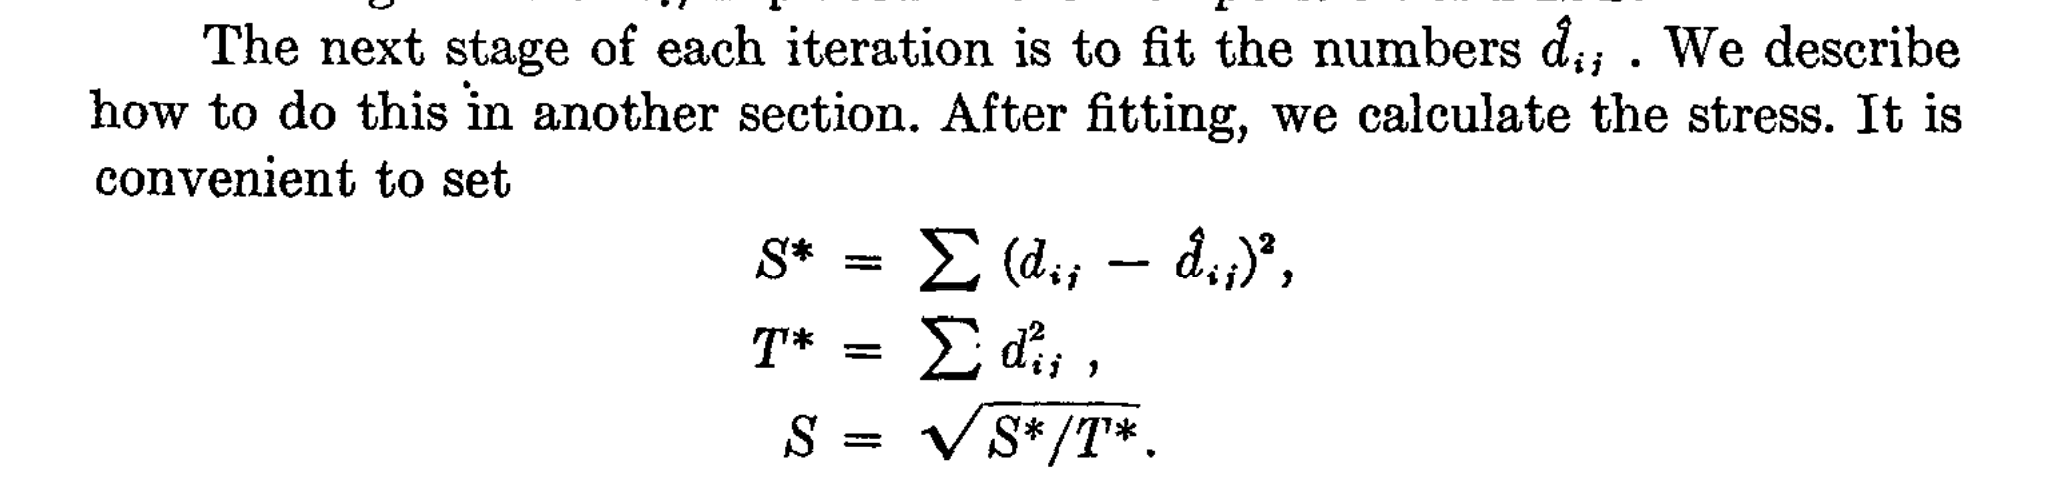
Stress Loss function from Kruskal, 1964

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [99]:
# todo make doctest for relevant fxs
index = 5
max_rows = 19
fake_dist_vec = np.ones(((max_rows**2 - max_rows)//2, 1))
eye_ref = np.eye(N=max_rows, M = index)
ei_minus_ejs =  eye_ref[:,:-1] - eye_ref[:,-1].reshape(max_rows,1)


In [100]:
test_outer = np.outer(ei_minus_ejs[:,3],ei_minus_ejs[:,3])
test_config = generate_starting_configuration(fake_dist_vec, max_rows)
outer_list = np.apply_along_axis(func1d=self_outer, axis=0, arr=ei_minus_ejs)

In [101]:
pairwise_dist_over_chunks = [pairwise_dist_block_chunk(outer_list[:,:,k], test_config) for k in range(outer_list.shape[2]) ]


In [102]:
pairwise_dist_over_chunks

[4.0, 10.0, 1.0, 13.0]

In [103]:
pairwise_dists_of_block(4, test_config)

array([5., 1., 8.])

In [104]:
np.array_equal(outer_list[:,:,3], np.outer(ei_minus_ejs[:,3],ei_minus_ejs[:,3]))

True

In [105]:
len(get_pairwise_distances(test_config))

171

In [106]:
len(fake_dist_vec)

171

In [107]:
tf_config = tf.convert_to_tensor(test_config)
tf_get_pw_dist(tf_config)

<tf.Tensor: shape=(171, 1), dtype=float64, numpy=
array([[  2.],
       [  1.],
       [  5.],
       [  5.],
       [  1.],
       [  8.],
       [  4.],
       [ 10.],
       [  1.],
       [ 13.],
       [ 10.],
       [  4.],
       [ 13.],
       [  1.],
       [ 18.],
       [  9.],
       [ 17.],
       [  4.],
       [ 20.],
       [  1.],
       [ 25.],
       [ 17.],
       [  9.],
       [ 20.],
       [  4.],
       [ 25.],
       [  1.],
       [ 32.],
       [ 16.],
       [ 26.],
       [  9.],
       [ 29.],
       [  4.],
       [ 34.],
       [  1.],
       [ 41.],
       [ 26.],
       [ 16.],
       [ 29.],
       [  9.],
       [ 34.],
       [  4.],
       [ 41.],
       [  1.],
       [ 50.],
       [ 25.],
       [ 37.],
       [ 16.],
       [ 40.],
       [  9.],
       [ 45.],
       [  4.],
       [ 52.],
       [  1.],
       [ 61.],
       [ 37.],
       [ 25.],
       [ 40.],
       [ 16.],
       [ 45.],
       [  9.],
       [ 52.],
       [  4.],
     

In [108]:
## Steps 
### Define configuration 
#### for each training iteration
#### normalize 
#### find pairwise distances
#### monotone regression
#### gradient descent



In [109]:
start_config = generate_starting_configuration(dissimilarity_vec, len(big_matrix.index))


In [110]:
disty = PDistLayer()

In [111]:
disty(tf_config)

<tf.Tensor: shape=(171, 1), dtype=float64, numpy=
array([[  2.],
       [  1.],
       [  5.],
       [  5.],
       [  1.],
       [  8.],
       [  4.],
       [ 10.],
       [  1.],
       [ 13.],
       [ 10.],
       [  4.],
       [ 13.],
       [  1.],
       [ 18.],
       [  9.],
       [ 17.],
       [  4.],
       [ 20.],
       [  1.],
       [ 25.],
       [ 17.],
       [  9.],
       [ 20.],
       [  4.],
       [ 25.],
       [  1.],
       [ 32.],
       [ 16.],
       [ 26.],
       [  9.],
       [ 29.],
       [  4.],
       [ 34.],
       [  1.],
       [ 41.],
       [ 26.],
       [ 16.],
       [ 29.],
       [  9.],
       [ 34.],
       [  4.],
       [ 41.],
       [  1.],
       [ 50.],
       [ 25.],
       [ 37.],
       [ 16.],
       [ 40.],
       [  9.],
       [ 45.],
       [  4.],
       [ 52.],
       [  1.],
       [ 61.],
       [ 37.],
       [ 25.],
       [ 40.],
       [ 16.],
       [ 45.],
       [  9.],
       [ 52.],
       [  4.],
     

In [112]:
altadista = Lambda(lambda x:tf_get_pw_dist(x) )

In [114]:
model(tf_config)

<tf.Tensor: shape=(171, 1), dtype=float32, numpy=
array([[ 0.19885717],
       [ 0.09942859],
       [ 0.49714294],
       [ 0.49714294],
       [ 0.09942859],
       [ 0.7954287 ],
       [ 0.39771435],
       [ 0.9942859 ],
       [ 0.09942859],
       [ 1.2925715 ],
       [ 0.9942859 ],
       [ 0.39771435],
       [ 1.2925715 ],
       [ 0.09942859],
       [ 1.7897143 ],
       [ 0.89485717],
       [ 1.6902859 ],
       [ 0.39771435],
       [ 1.9885718 ],
       [ 0.09942859],
       [ 2.4857144 ],
       [ 1.6902859 ],
       [ 0.89485717],
       [ 1.9885718 ],
       [ 0.39771435],
       [ 2.4857144 ],
       [ 0.09942859],
       [ 3.1817148 ],
       [ 1.5908574 ],
       [ 2.585143  ],
       [ 0.89485717],
       [ 2.8834293 ],
       [ 0.39771435],
       [ 3.3805718 ],
       [ 0.09942859],
       [ 4.076572  ],
       [ 2.585143  ],
       [ 1.5908574 ],
       [ 2.8834293 ],
       [ 0.89485717],
       [ 3.3805718 ],
       [ 0.39771435],
       [ 4.076572  ],
    

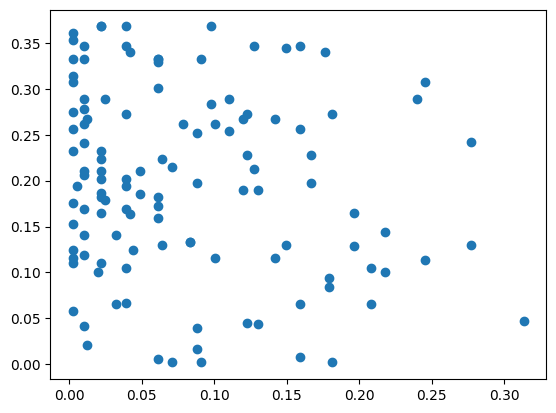

In [51]:
plt.scatter(dhat, dissimilarity_vec)
plt.show()

In [52]:
configuration.shape

(16, 2)

In [53]:
np.mean(configuration,0)

array([0.1113916, 0.1113916])

In [54]:
configuration

array([[0.04950738, 0.        ],
       [0.        , 0.04950738],
       [0.09901475, 0.        ],
       [0.        , 0.09901475],
       [0.14852213, 0.        ],
       [0.        , 0.14852213],
       [0.19802951, 0.        ],
       [0.        , 0.19802951],
       [0.24753689, 0.        ],
       [0.        , 0.24753689],
       [0.29704426, 0.        ],
       [0.        , 0.29704426],
       [0.34655164, 0.        ],
       [0.        , 0.34655164],
       [0.39605902, 0.        ],
       [0.        , 0.39605902]])

In [49]:
## Training loop
N_EPOCHS = 2


In [50]:
# wrap in function
configuration = deepcopy(start_config)
for epoch in range(N_EPOCHS):
    # normalize! 
    #TODO: Convert to pure tf
    configuration/=np.linalg.norm(configuration)
    # pairwise dist 
    ### Two options here: 
    #### 1. (suboptimal) use the "canned" formulas for the gradient and just use TF for the monotone regression
    #### 2. write the first layer after the inputs to compute pairwise distances and then to vectorize the lower tri, followed by a couple dense layers 
    
    

In [55]:
# Derivative analyses


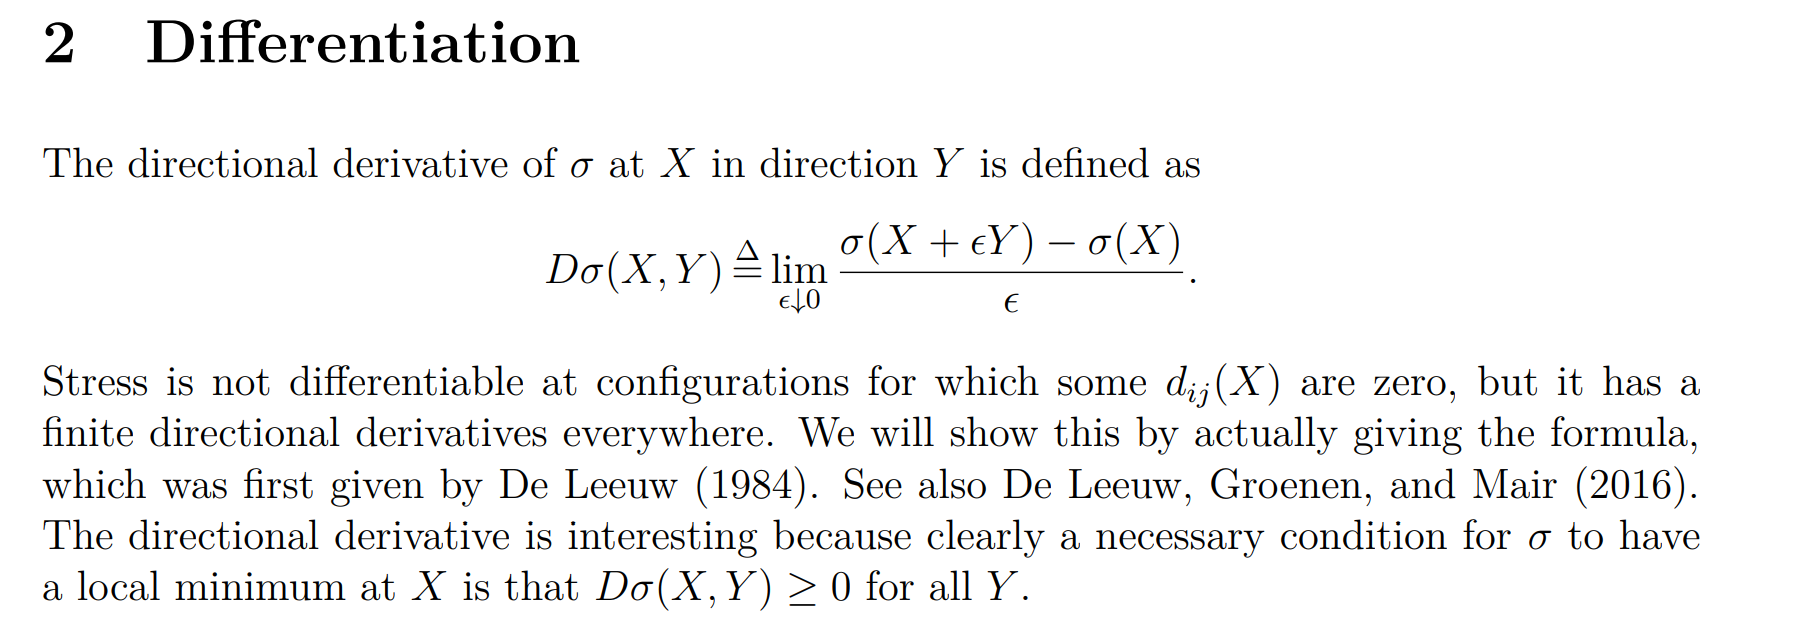
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/

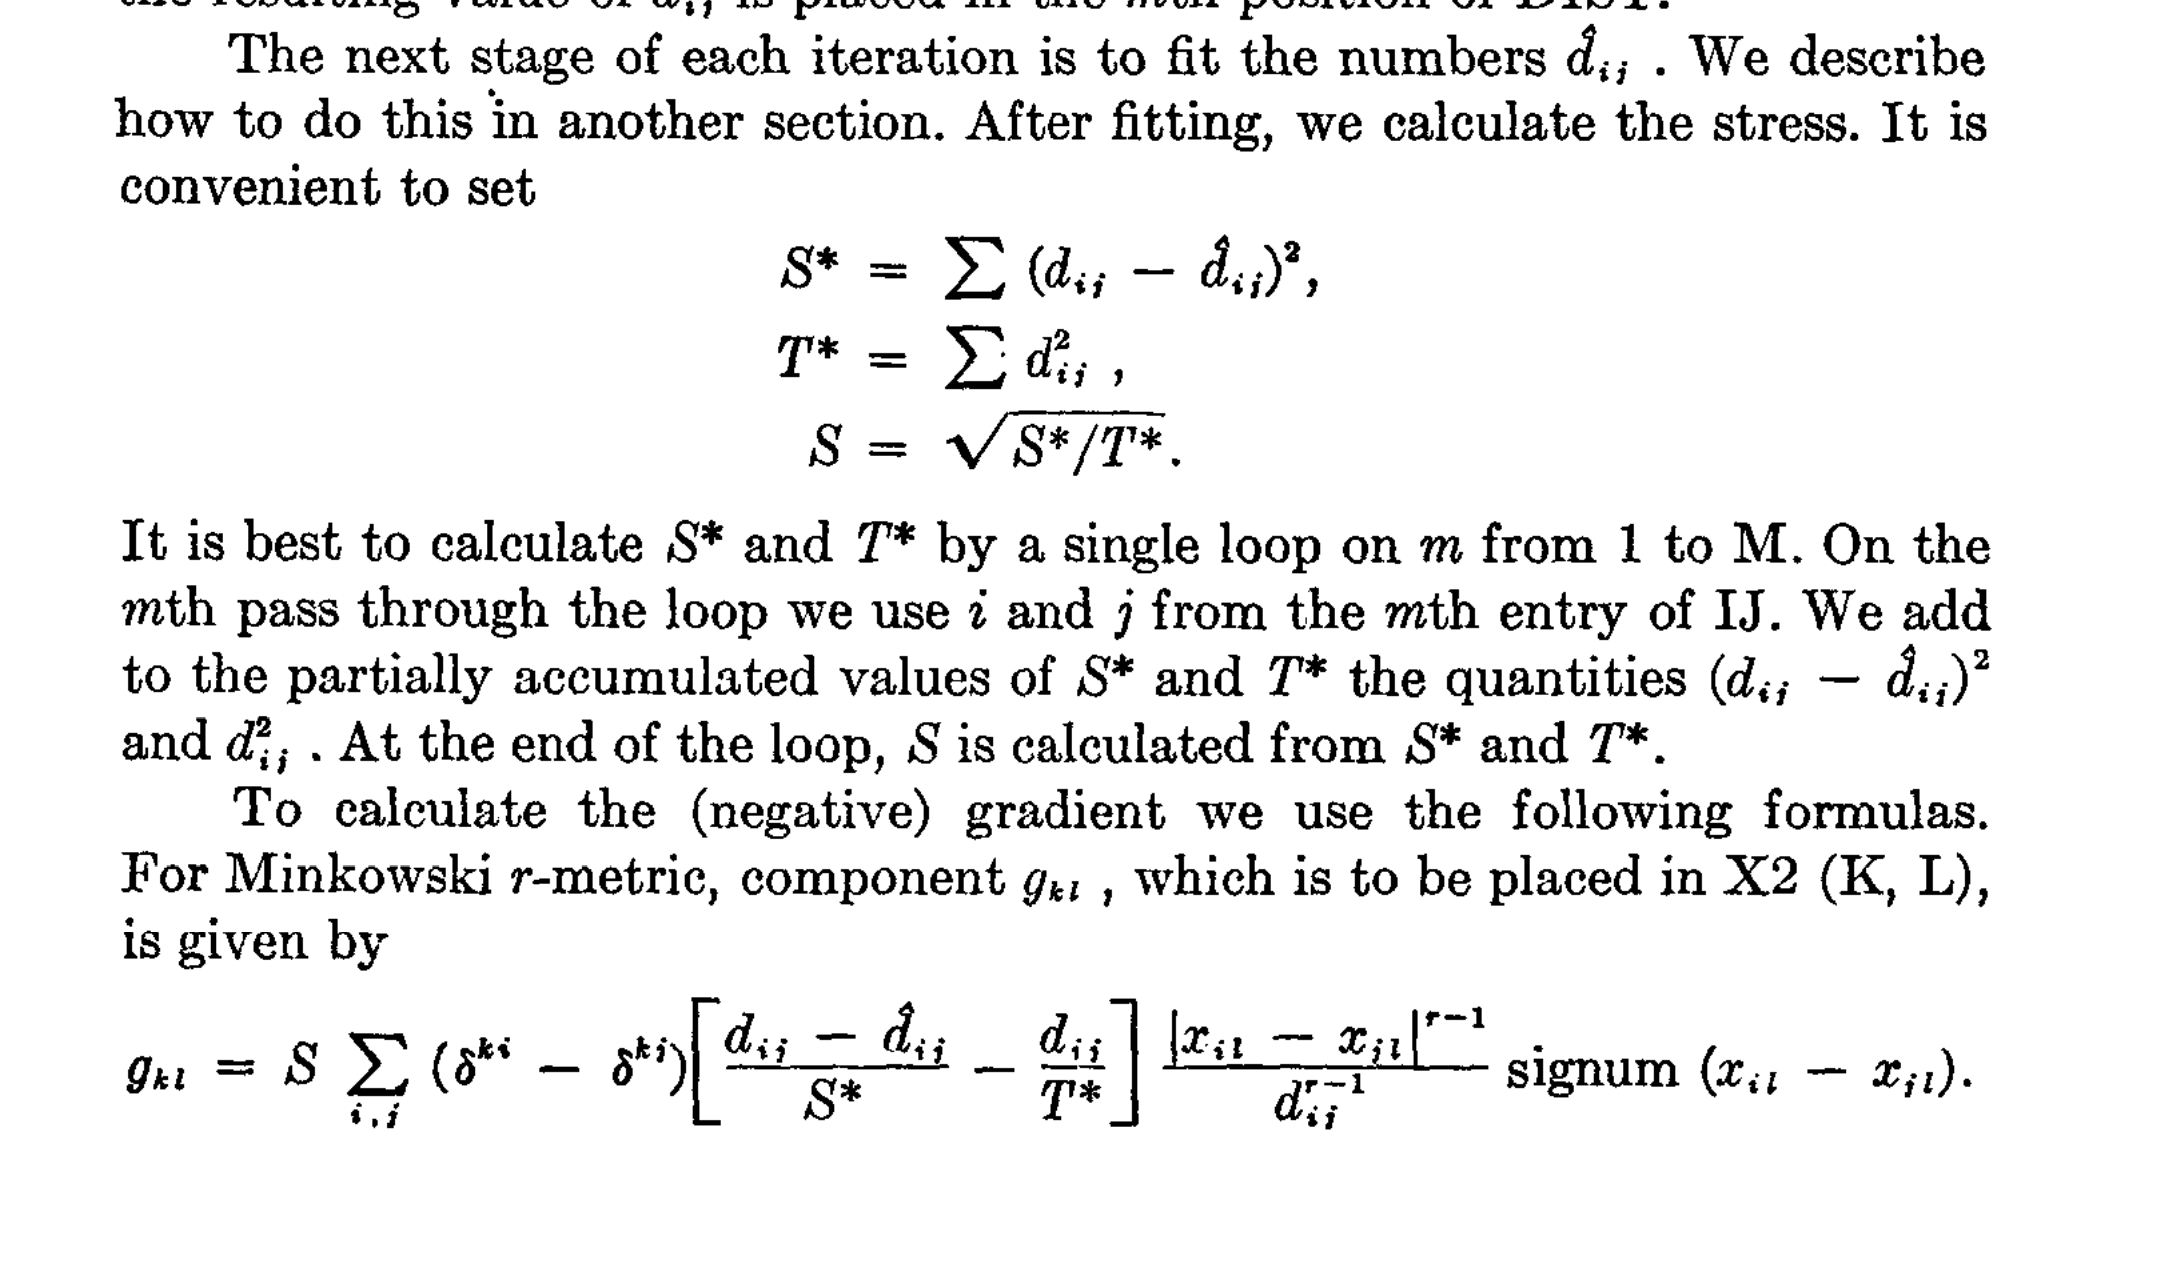
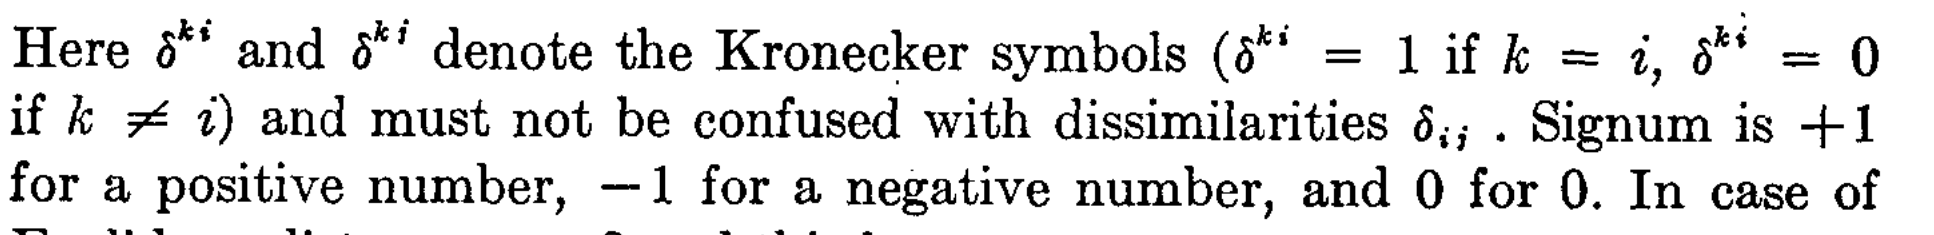
From Kruskal, 1964